# Mann-Whitney U Testing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [2]:
def get_normal_data():
    df=pd.read_csv("features_embedded.csv")
    df['norm_road']=df[['Signal', 'bus_stop', 'Turn','Congestion']].apply(lambda e: 1 if e[0]==e[1]==e[2]==e[3]==0 else 0,axis=1)
    return df

def get_feature_set_for(target_column):
    df=pd.read_csv("features_embedded.csv")
    df['norm_road']=df[['Signal', 'bus_stop', 'Turn','Congestion']].apply(lambda e: 1 if e[0]==e[1]==e[2]==e[3]==0 else 0,axis=1)

    labels=df[[target_column]].values
    features=df.drop(columns=['norm_road','Signal', 'bus_stop', 'Turn','Congestion'])

    oversample = SMOTE()
    features,labels = oversample.fit_resample(features,labels)
    labels=labels.reshape(-1,1)
    features[target_column]=labels
    return features

In [3]:
population=get_normal_data()

In [4]:
def MannWhitneyu_test(target_column,features):
    foi=['next_stop_distance','total_waiting_time','wifi_count','honks','rsi']
    p_vals=[]
    for feat in foi:
        res=mannwhitneyu(features[features[target_column].round()==1][feat].values.flatten(),
                         population[feat].values.flatten(),
                         alternative=None)
        p_vals.append(res.pvalue*100)
    return foi,p_vals

In [5]:
properties=[
'time_level_1',
'time_level_2',
'time_level_3',
'time_level_4',
'zone_highway',
'zone_market_place',
'zone_normal_city',
'Population_density_dense',
'Population_density_medium',
'Population_density_sparse',
'Weekend/day_Week-day',
'Weekend/day_Week-end']

In [6]:
def plot_Result(title,features):
    fig=plt.figure(figsize=(20,15))
    fig.suptitle(title,size=20)
    for i,prop in enumerate(properties):
        ax=fig.add_subplot(3,4,i+1)
        ax.bar(*MannWhitneyu_test(prop,features),color=sns.color_palette())
        ax.hlines(5,-0.5,4.5,colors='k',linestyles='dashed')
        ax.set_ylabel('p_value<%>:{}'.format(prop))
        ax.set_ylim(0,50)
        ax.set_xlabel('')
        ax.tick_params(axis='x', labelrotation=17)
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
        ax.spines["left"].set_visible(False)

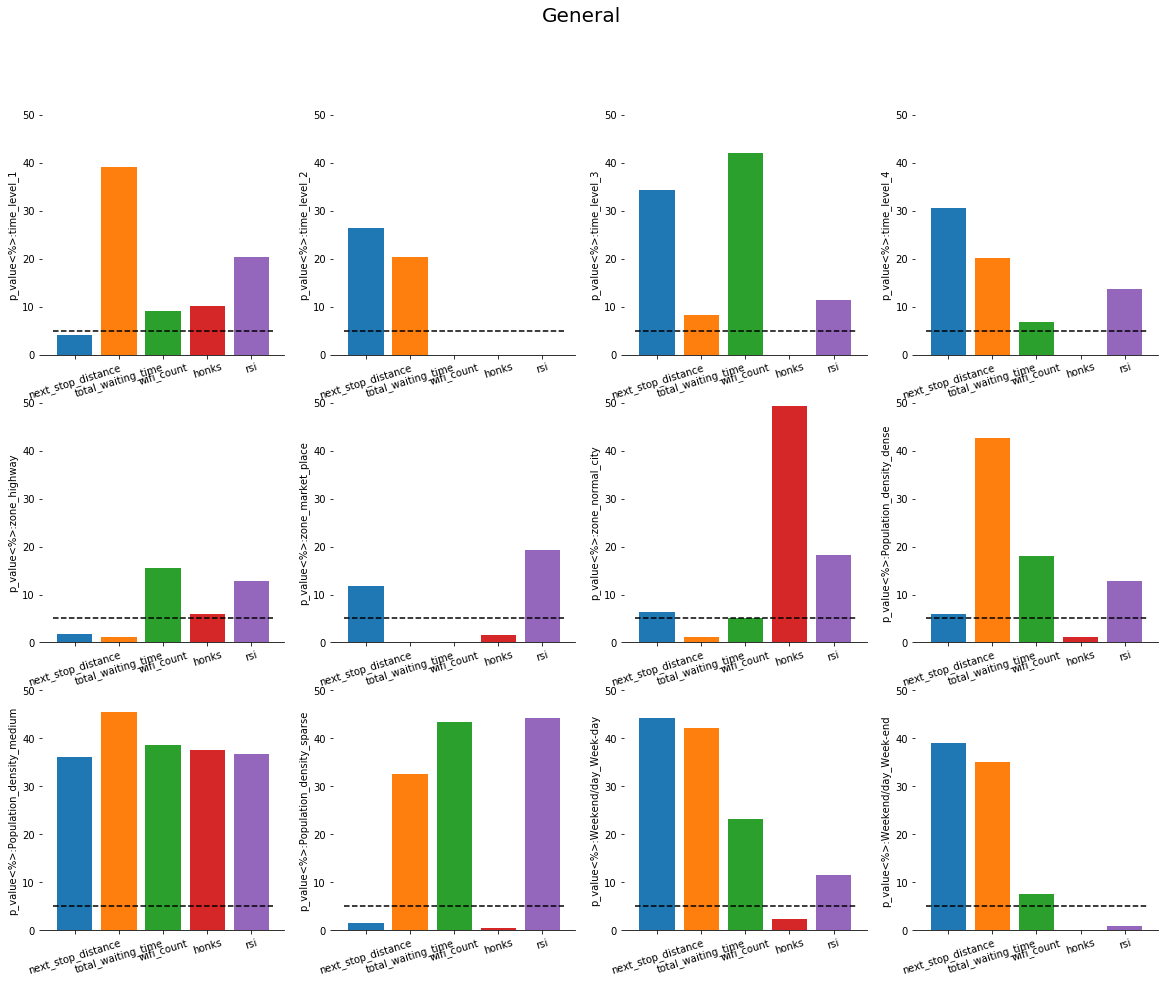

In [7]:
plot_Result('General',get_normal_data())

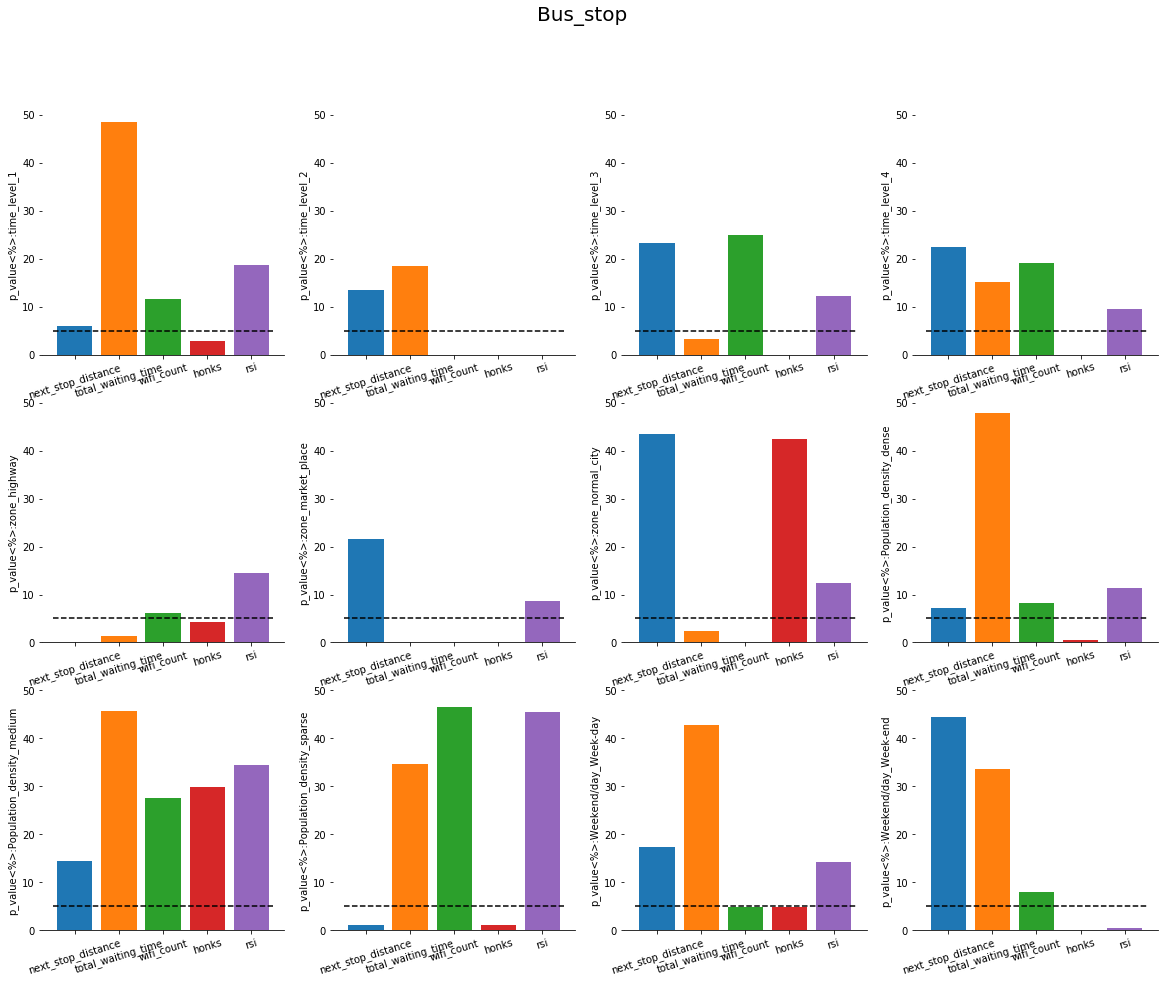

In [8]:
plot_Result('Bus_stop',get_feature_set_for('bus_stop'))

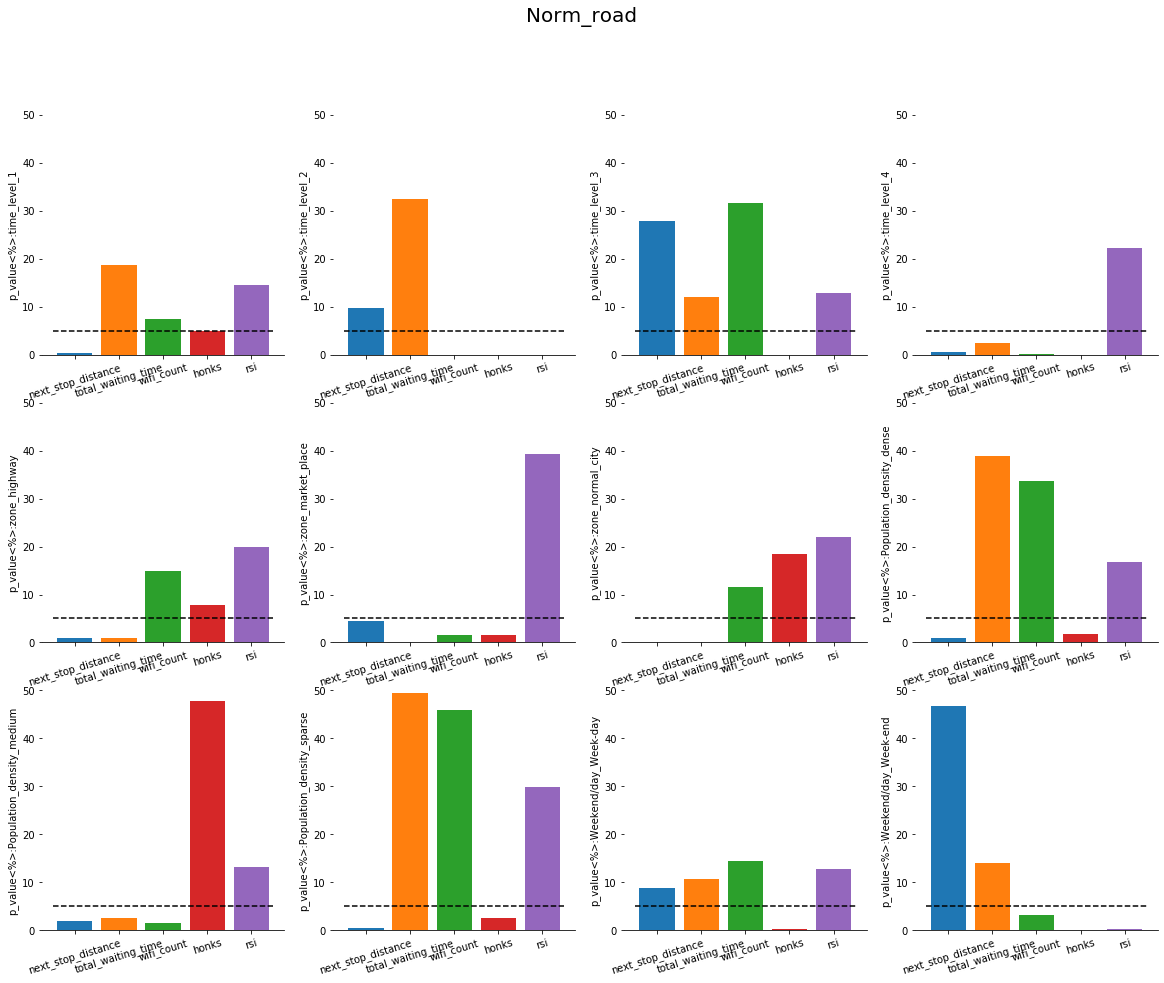

In [9]:
plot_Result('Norm_road',get_feature_set_for('norm_road'))

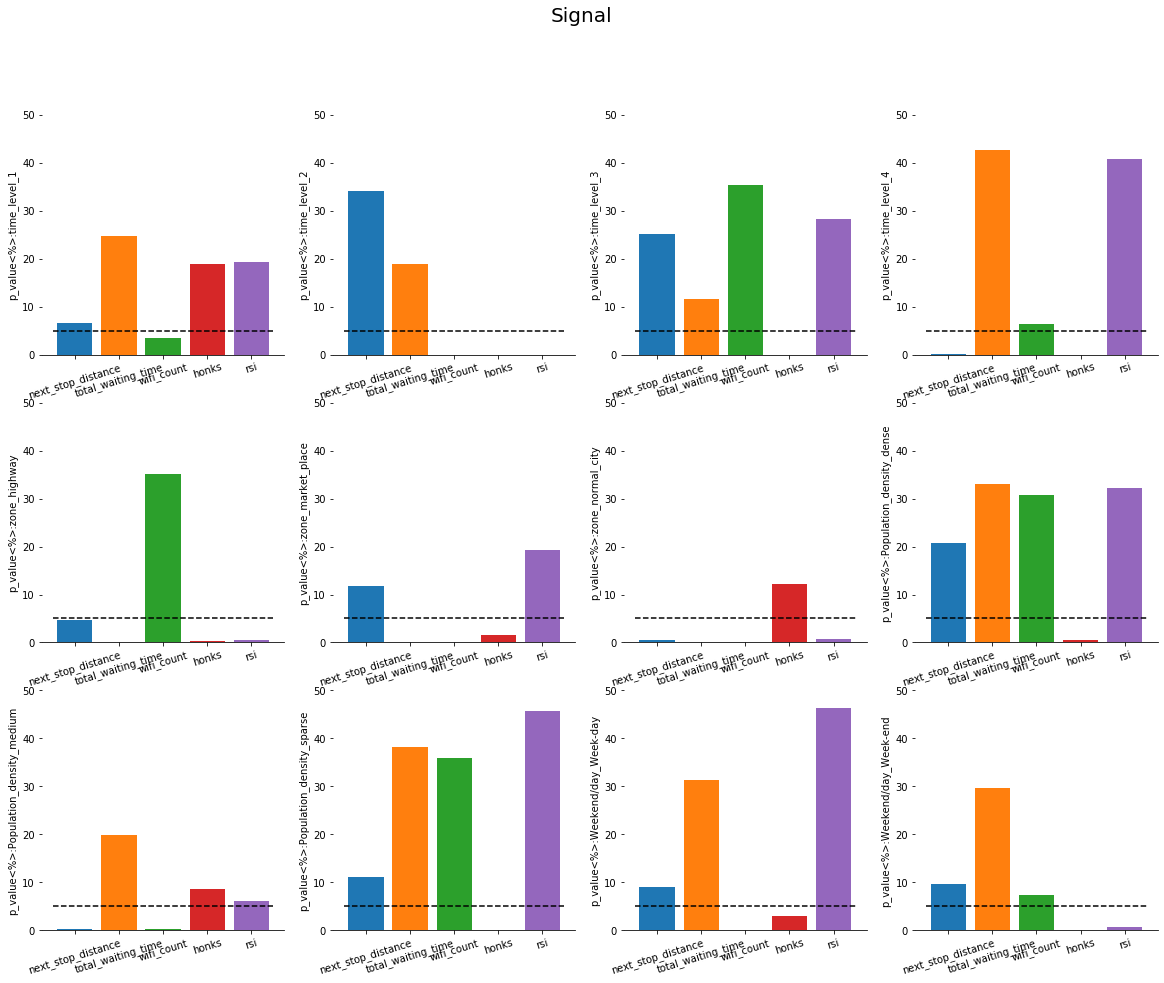

In [10]:
plot_Result('Signal',get_feature_set_for('Signal'))

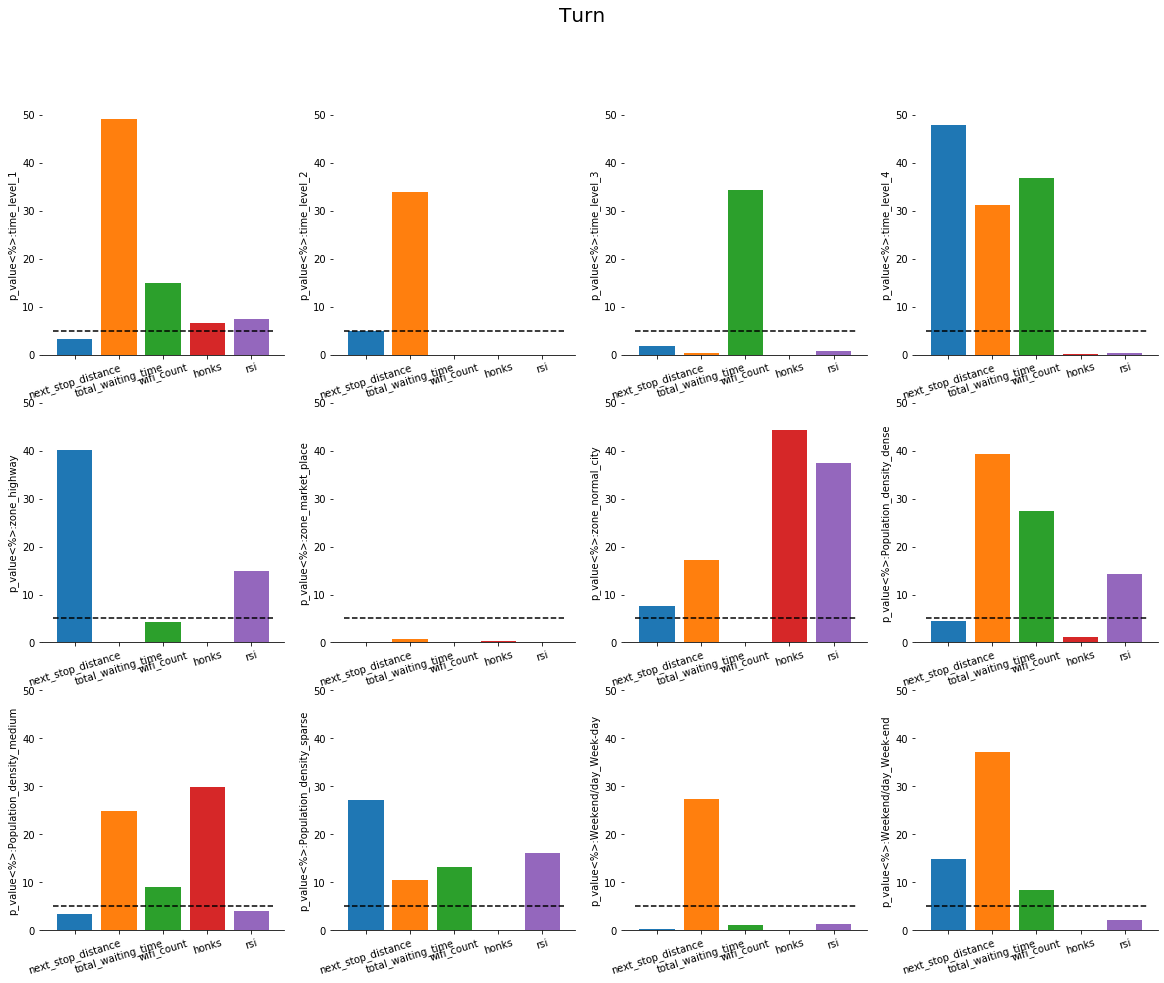

In [11]:
plot_Result('Turn',get_feature_set_for('Turn'))

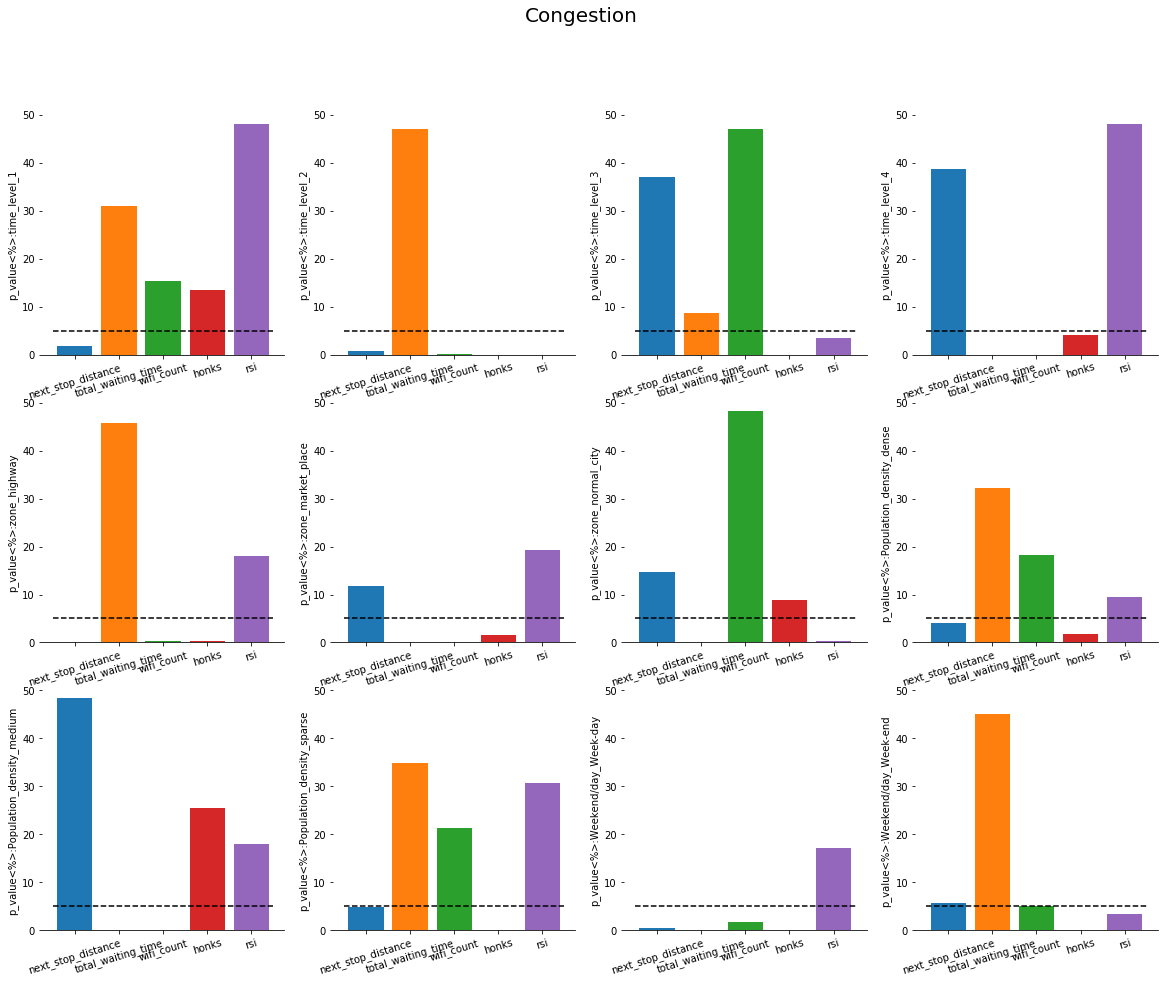

In [12]:
plot_Result('Congestion',get_feature_set_for('Congestion'))

In [13]:
#NICE